In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data 

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

* The data consists of 8 column and 1000 rows

### 1. Import the data

In [2]:
df = pd.read_csv("../data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [3]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 1000
Columns: 8


#### Data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 2. Data Checks

#### 2.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

#### 2.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

#### 2.3 Check data types

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### 2.4 Check number of unique values

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 2.5 Check statistics of data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* All the means and standard deviations are close to each other


#### 2.6 Check categories in each column

In [10]:
# define numerical & categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns

print("we have {} numerical features  : {}".format(len(numerical_features),numerical_features))
print("we have {} categorical features: {}".format(len(categorical_features),categorical_features))

we have 3 numerical features  : ['math score', 'reading score', 'writing score']
we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
for feature in categorical_features:
    print("Categores in '{}' :{}".format(feature,df[feature].unique()))


Categores in 'gender' :['female' 'male']
Categores in 'race/ethnicity' :['group B' 'group C' 'group A' 'group D' 'group E']
Categores in 'parental level of education' :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categores in 'lunch' :['standard' 'free/reduced']
Categores in 'test preparation course' :['none' 'completed']


#### 2.7 Check numerical data features

Number of students with full marks

In [12]:
math_full = df[df['math score'] == 100]['math score'].count()
reading_full = df[df['reading score'] == 100]['reading score'].count()
writing_full = df[df['writing score'] == 100]['writing score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


Number of students with less than 20 marks

In [13]:
math_less_20 = df[df['math score'] <= 20]['math score'].count()
reading_less_20 = df[df['reading score'] <= 20]['reading score'].count()
writing_less_20 = df[df['writing score'] <= 20]['writing score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


#### 2.8 Add new features from existing features
In this case, 'Total Score' and 'Average'

In [14]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 3. Exploring data (Visualization)

#### 3.1 Visualization of average 
* Histogram
* Kernel Distribution Function(KDE)

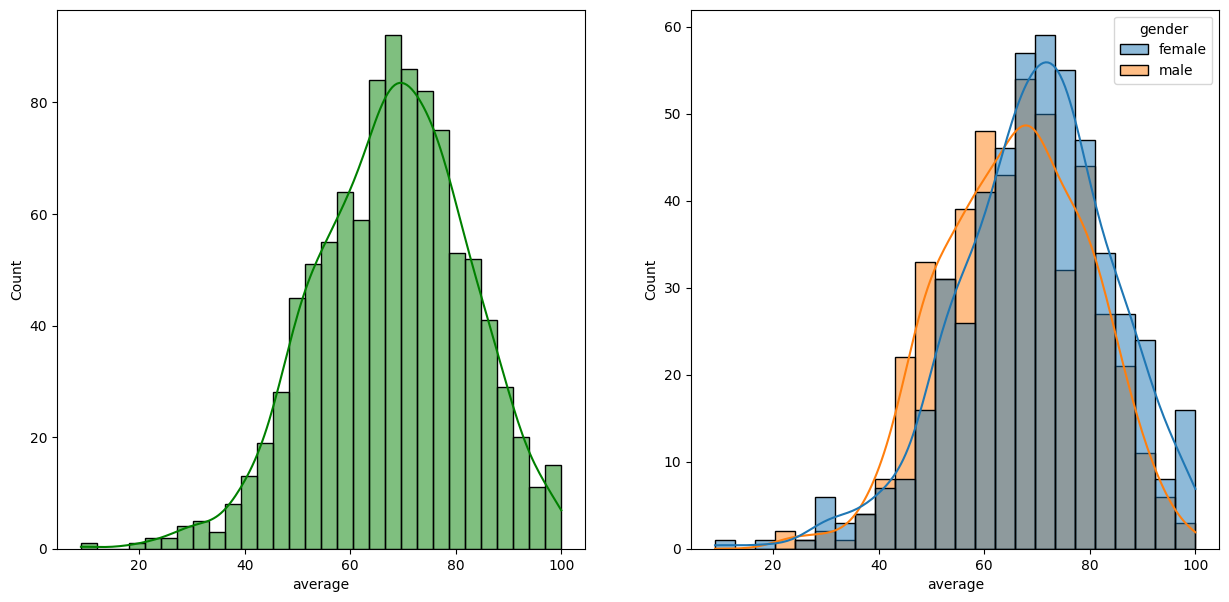

In [15]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

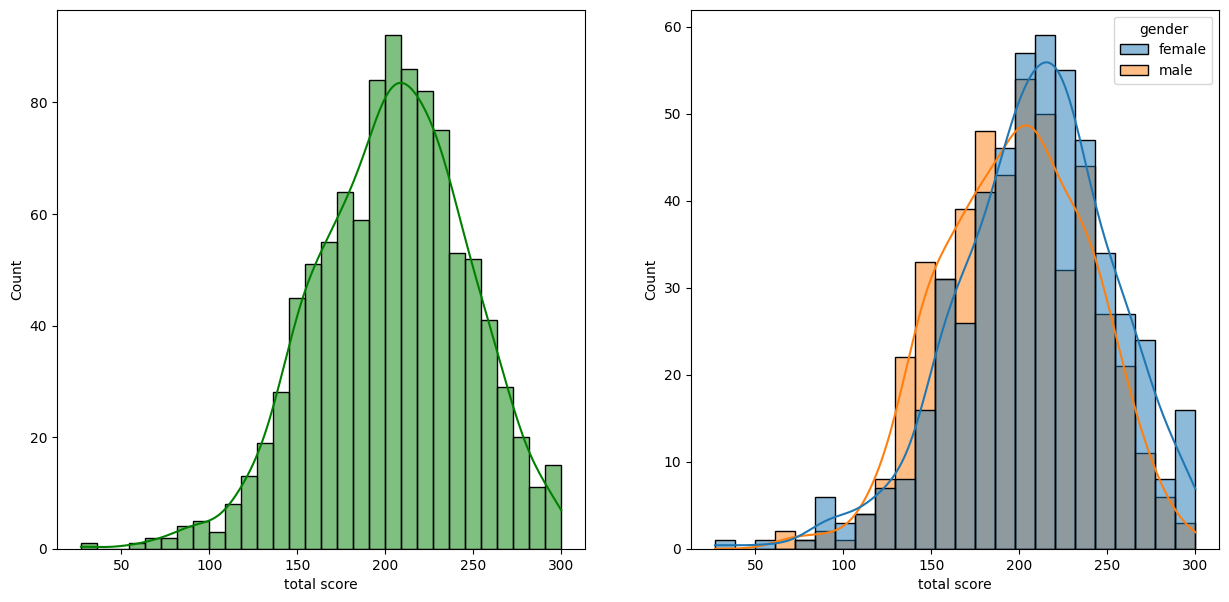

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

**Insights**
* Female students tend to perform well than male students

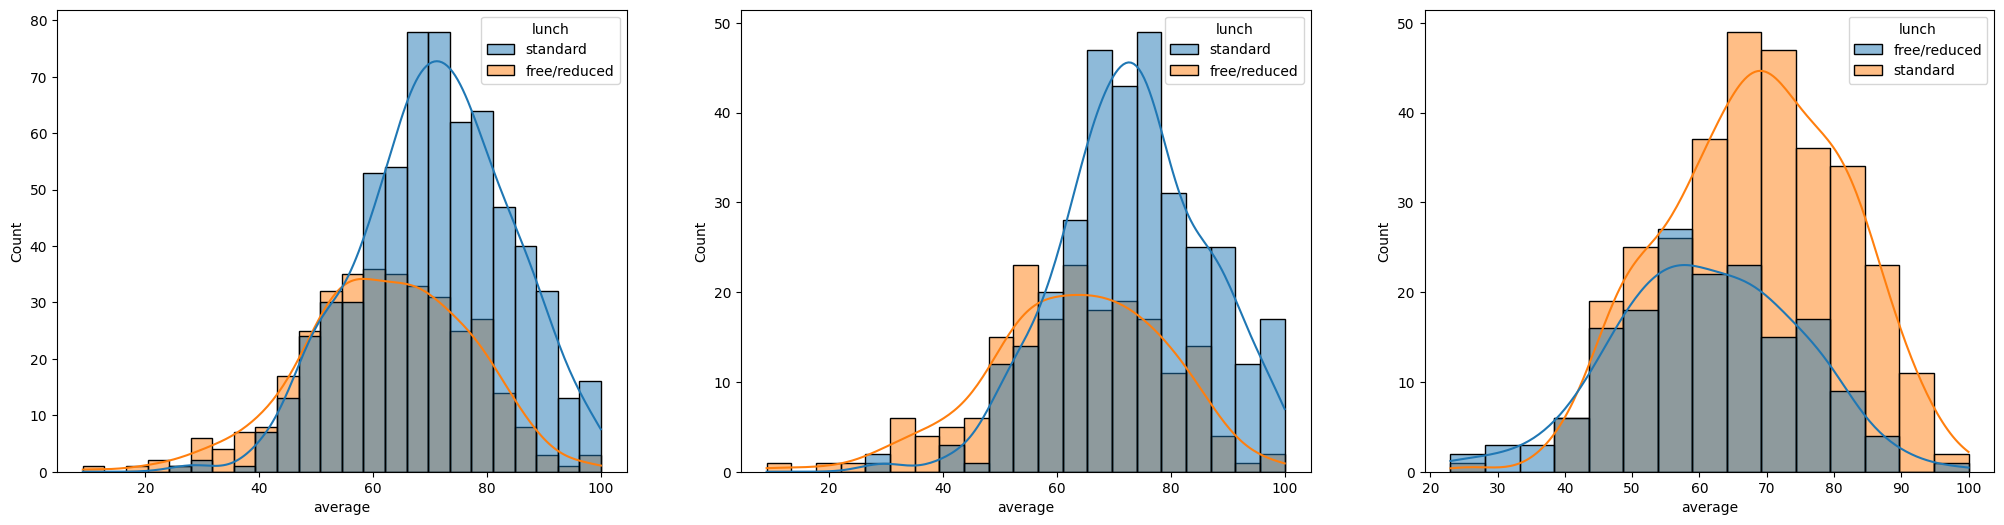

In [17]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.show()

**Insights**
* Standard lunch helps to perform well in exams for both genders

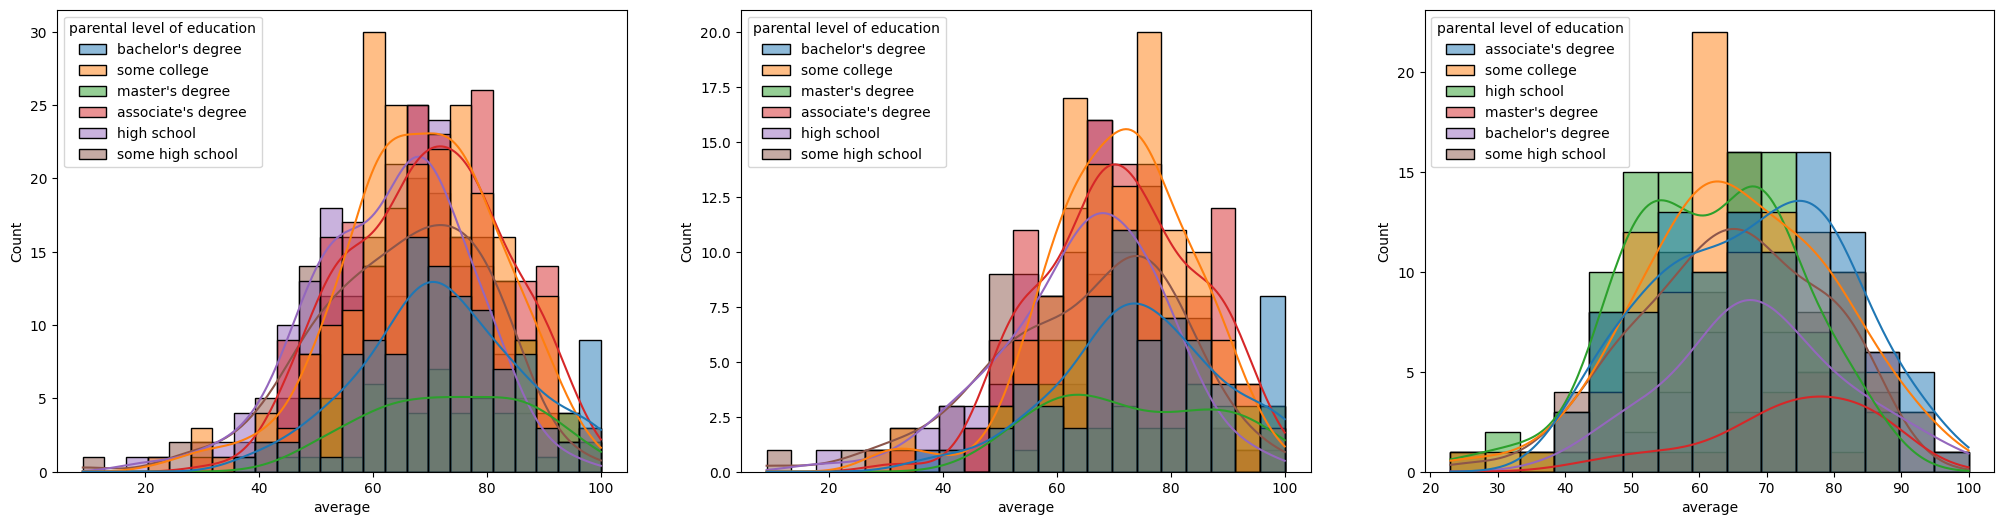

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.show()

**Insights**
* 'parental level of education' does not help female students
* In male students associate's degree and master's degree tend to perform well

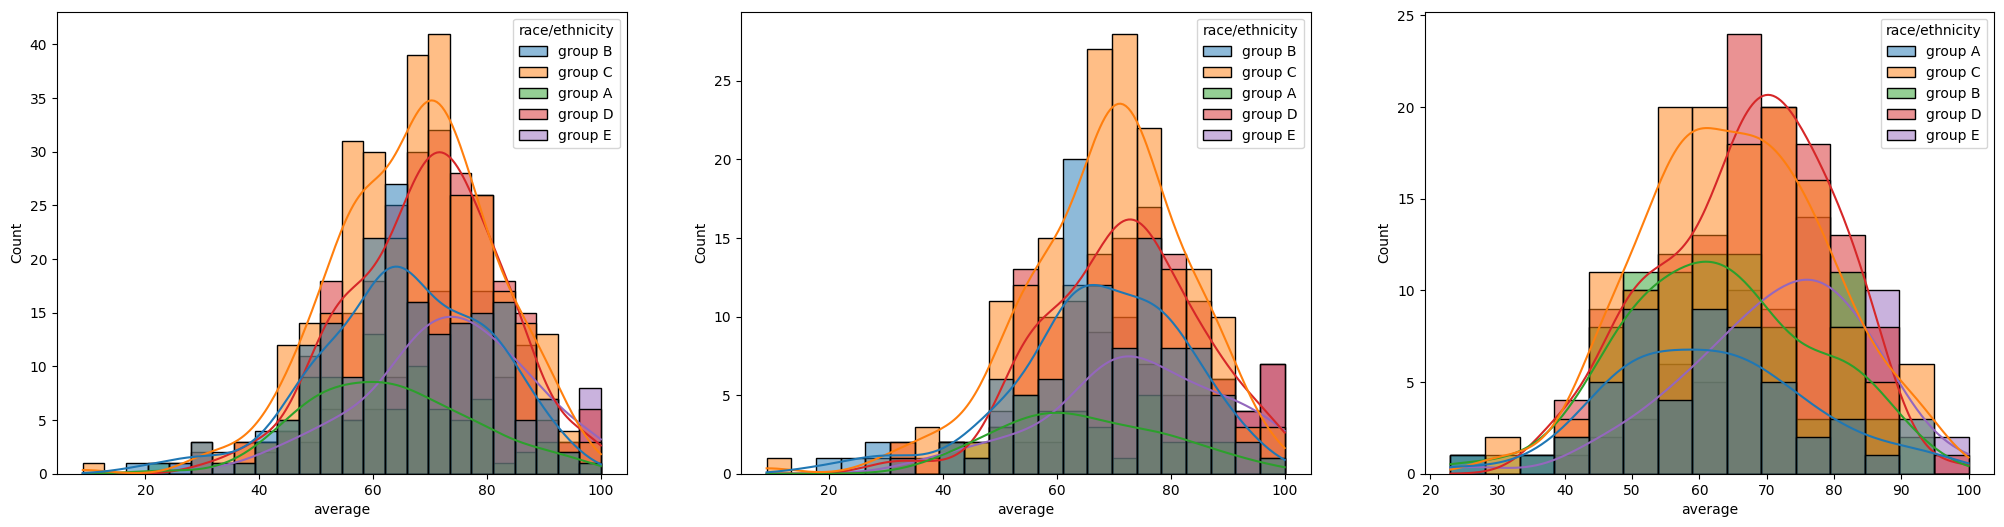

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

**Insights**
* Students of group A and group B tend to perform poorly in exams
* Male students of group E tend to perform better than others and group C tend to perform poorly

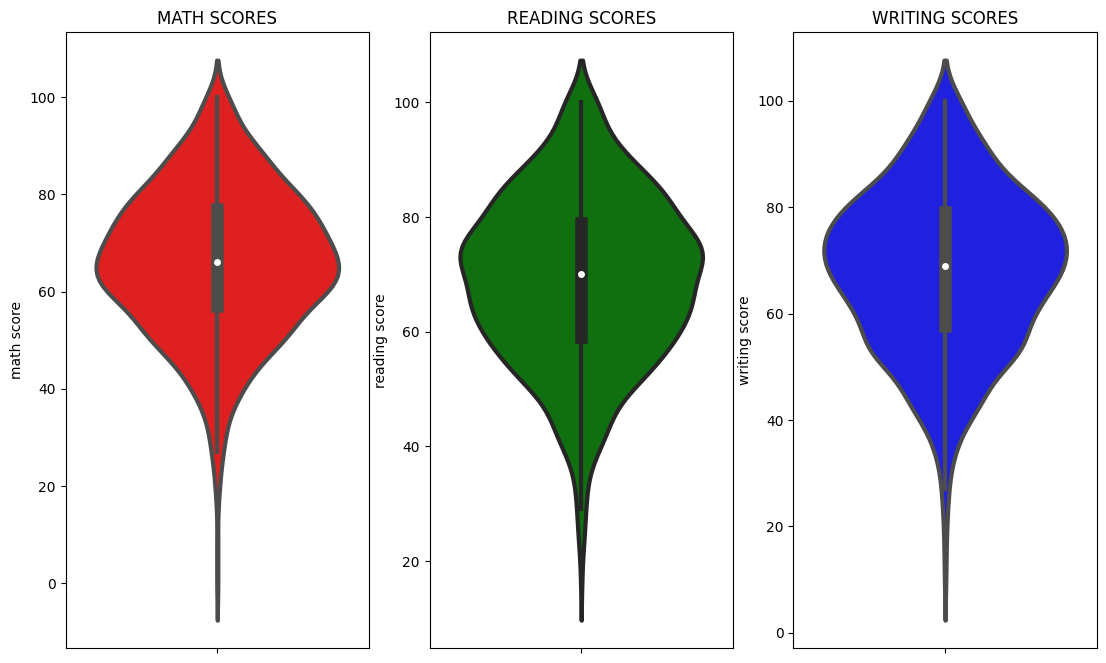

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
* Most of the students score in between 60-80 in maths whereas in reading and writing, most of them score 50-85

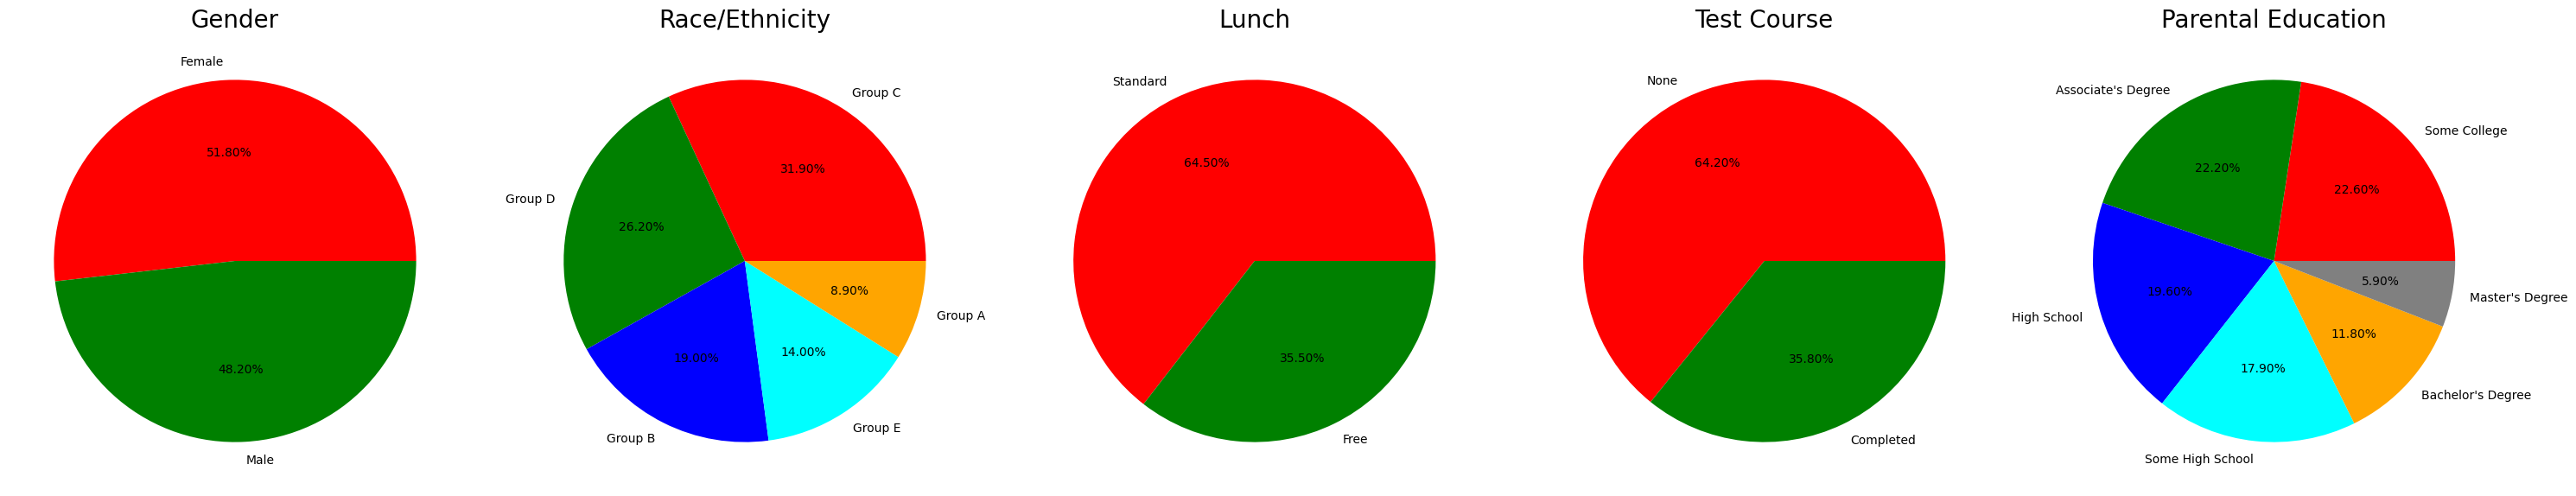

In [21]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**
* Number of male and female students are almost equal
* There are more students in group C than others
* Almost double number of students had standard lunch compared to free
* Number of students without any test preparation course is grater
* Number of students with a parental education of master's degree is less than others

#### 3.2 Feature Wise Visualization

##### 3.2.1 Gender Column

**UNIVARIATE ANALYSIS (How is distribution of Gender ?)**

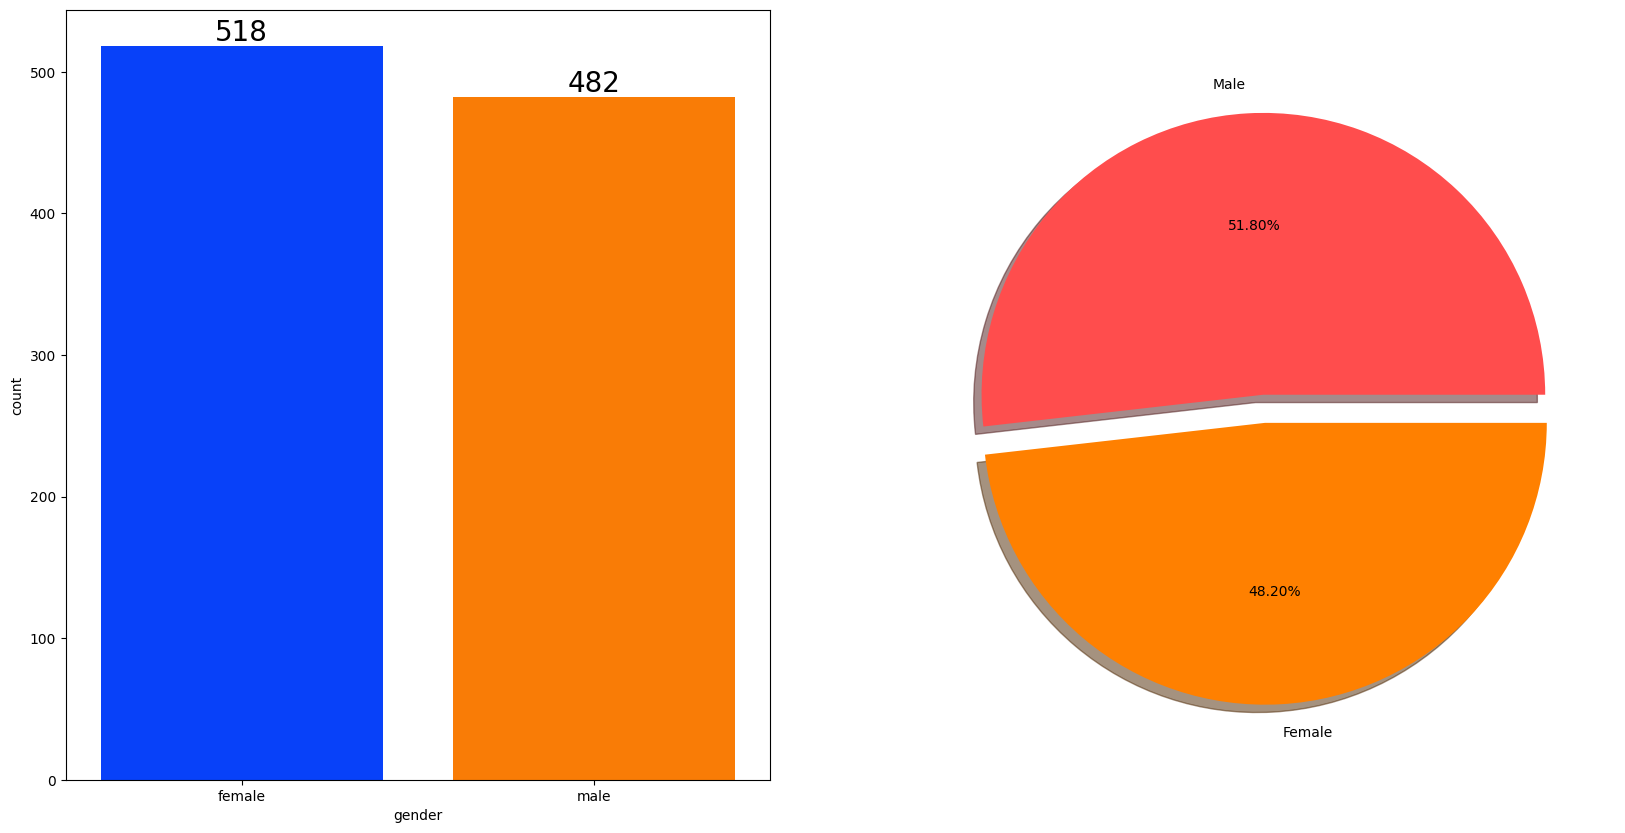

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%.2f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**
* Gender has balanced data with 48% female students and 52% male students

**BIVARIATE ANALYSIS (Is gender has any impact on student's performance ?)**

In [23]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


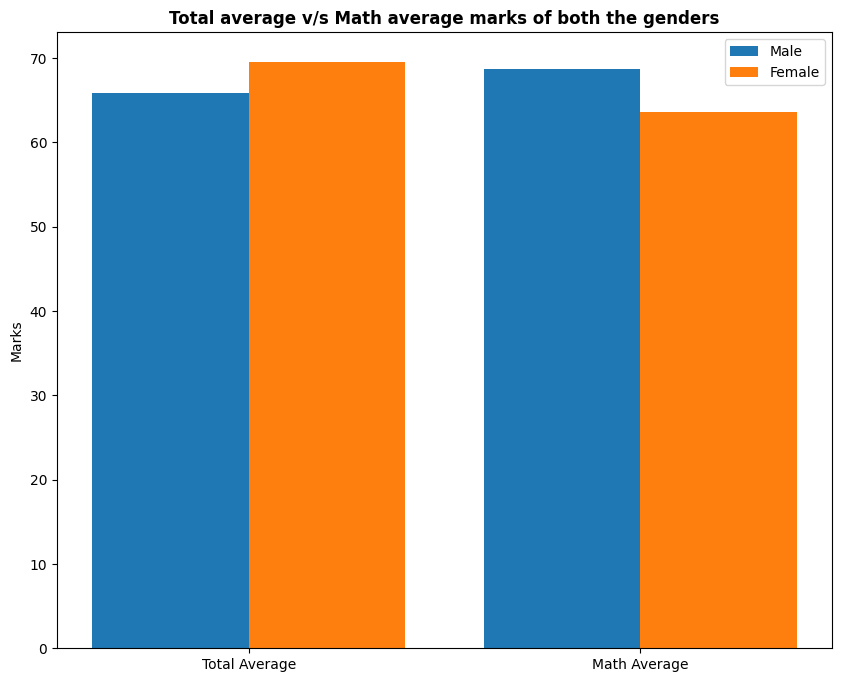

In [24]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**
* Female students have better overall score than male students
* Male students have better overall score than female students

##### 3.2.2 Race/Ethnicity Column

**UNIVARIATE ANALYSIS (How is distribution of groups ?)**

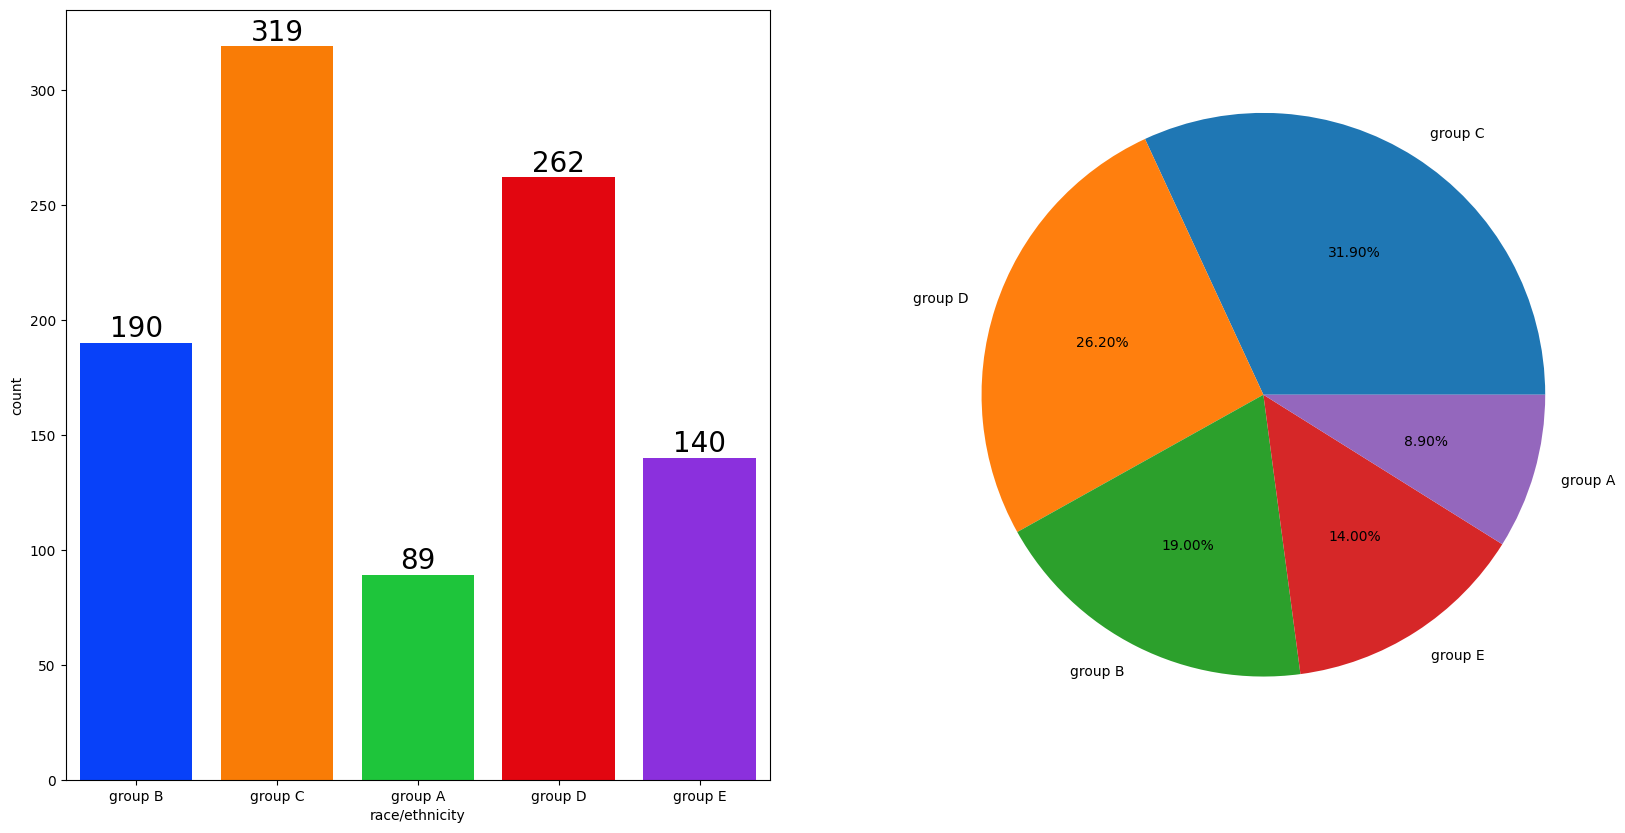

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,autopct='%.2f%%')
plt.show()

**Insights**
* Most of the students are from group C or group D
* Group A has the lowest number of students

**BIVARIATE ANALYSIS (Is Race/Ehnicity has any impact on student's performance ?)**

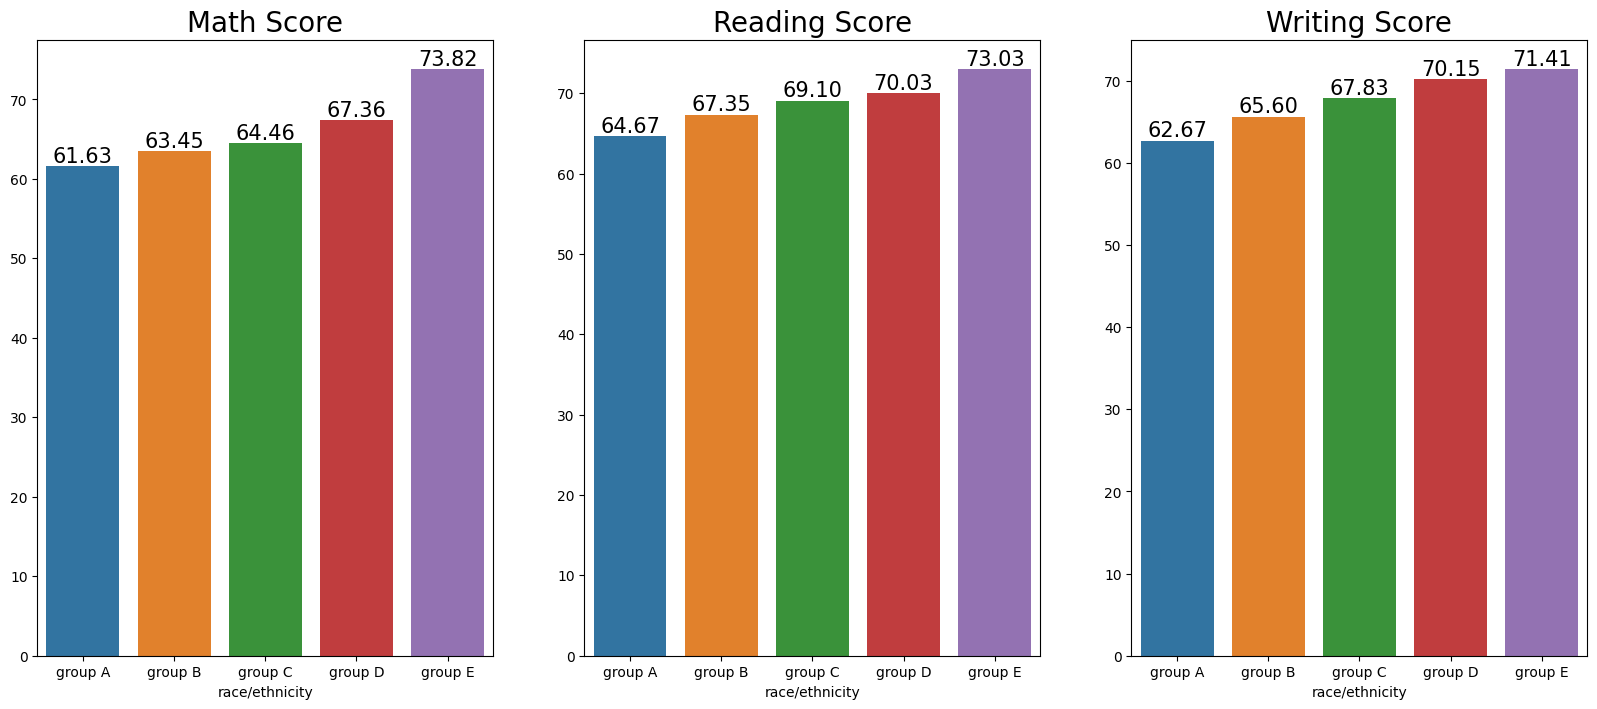

In [26]:
Group_data2=df.groupby('race/ethnicity')


f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,ax=ax[0])
ax[0].set_title('Math Score',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15,fmt='%.2f')

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,ax=ax[1])
ax[1].set_title('Reading Score',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15,fmt='%.2f')

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,ax=ax[2])
ax[2].set_title('Writing Score',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15,fmt='%.2f')
    

**Insights**
* Group E students have scored the highest marks
* Group A students have scored the lowest marks

##### 3.2.3 Parental Level of Education Column

**UNIVARIATE ANALYSIS (What is the distribution of parental level of education?)**

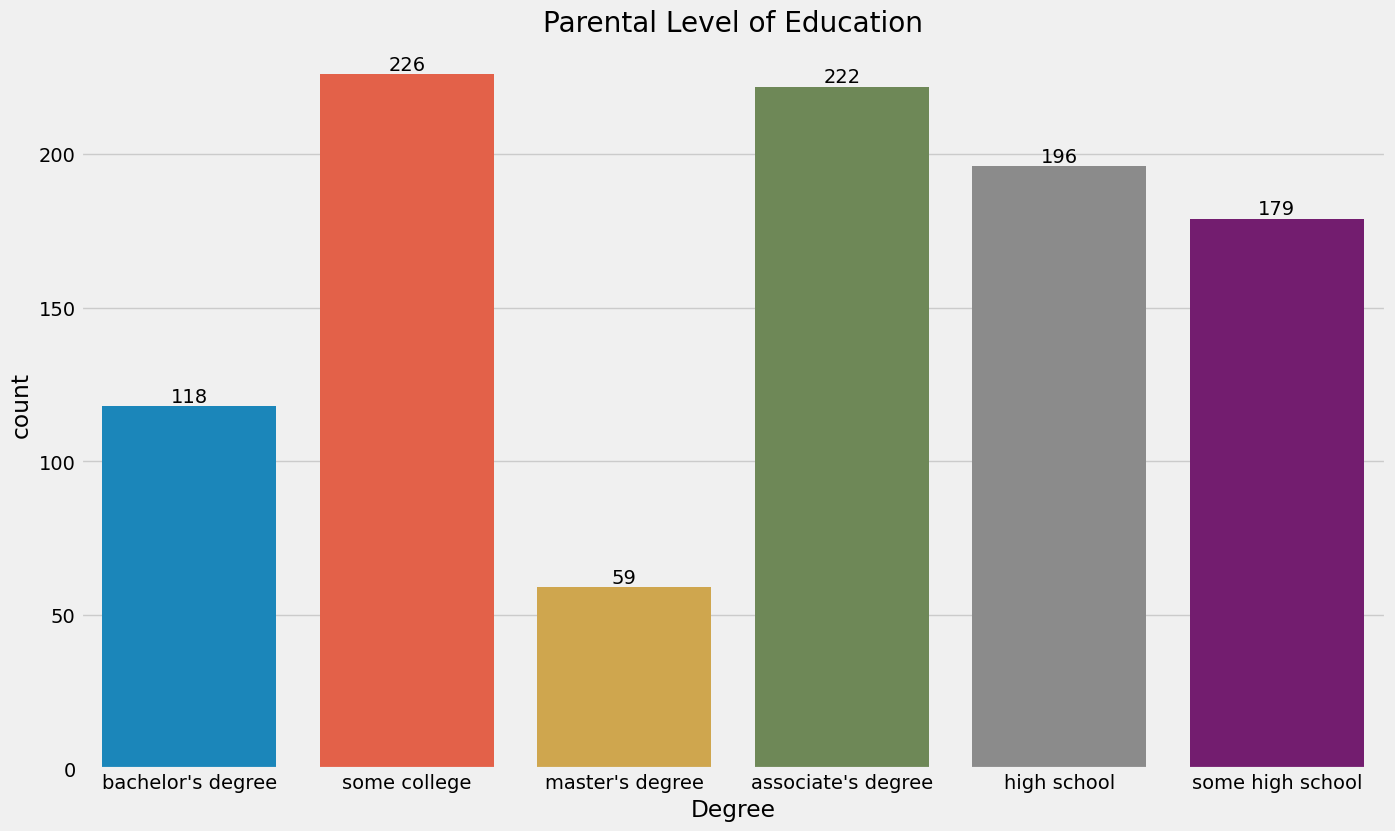

In [27]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x=df['parental level of education'],data=df)
plt.title('Parental Level of Education')
plt.xlabel('Degree')
plt.ylabel('count')
ax.bar_label(container=ax.containers[0])
plt.show()

**Insights**
* Largest number of parents are from some college

**BIVARIATE ANALYSIS (Is parental education has any impact on student's performance ?)**

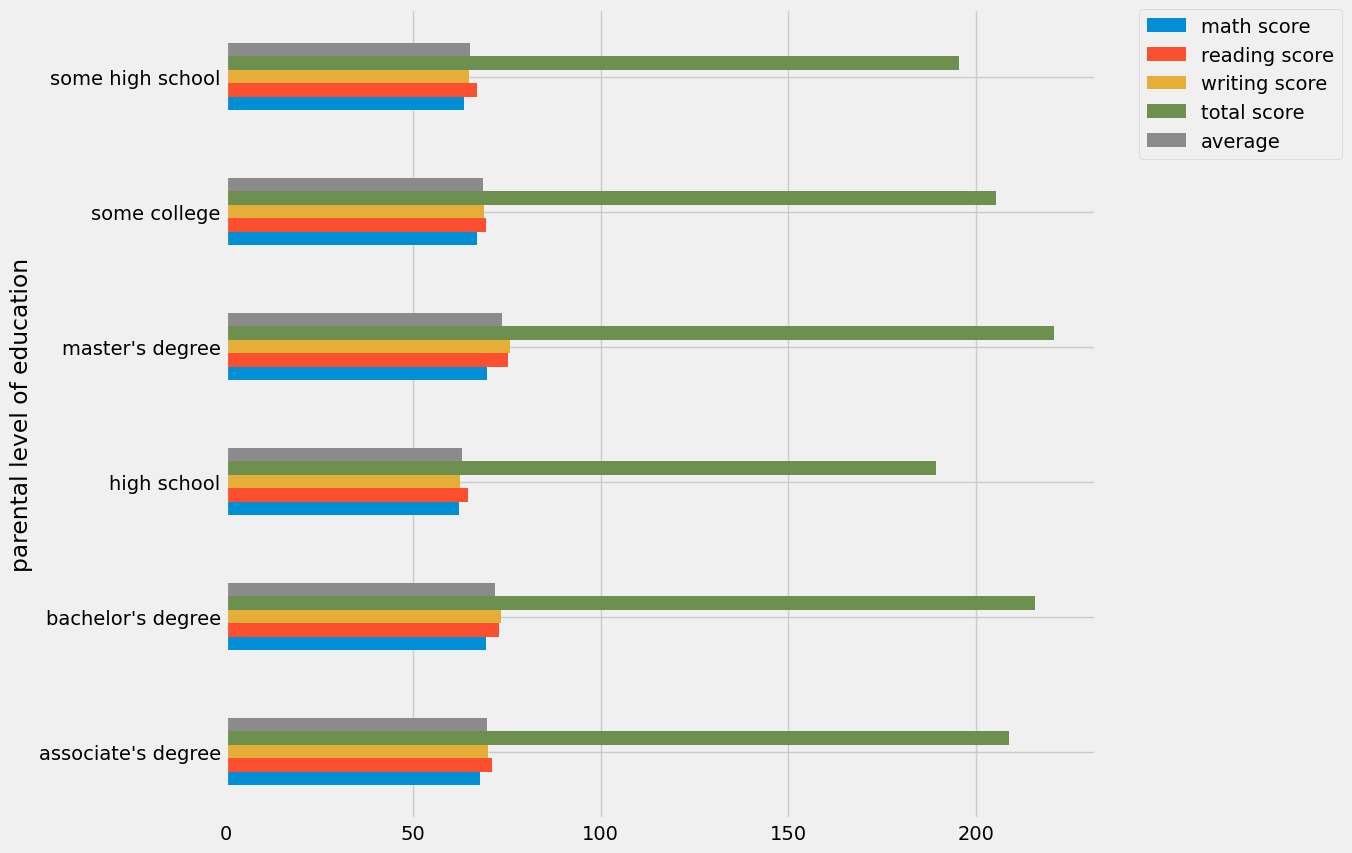

In [28]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
* The score of student whose parents possess master and bachelor level education are higher than others

##### 3.2.4 Lunch Column

**UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students ?)**

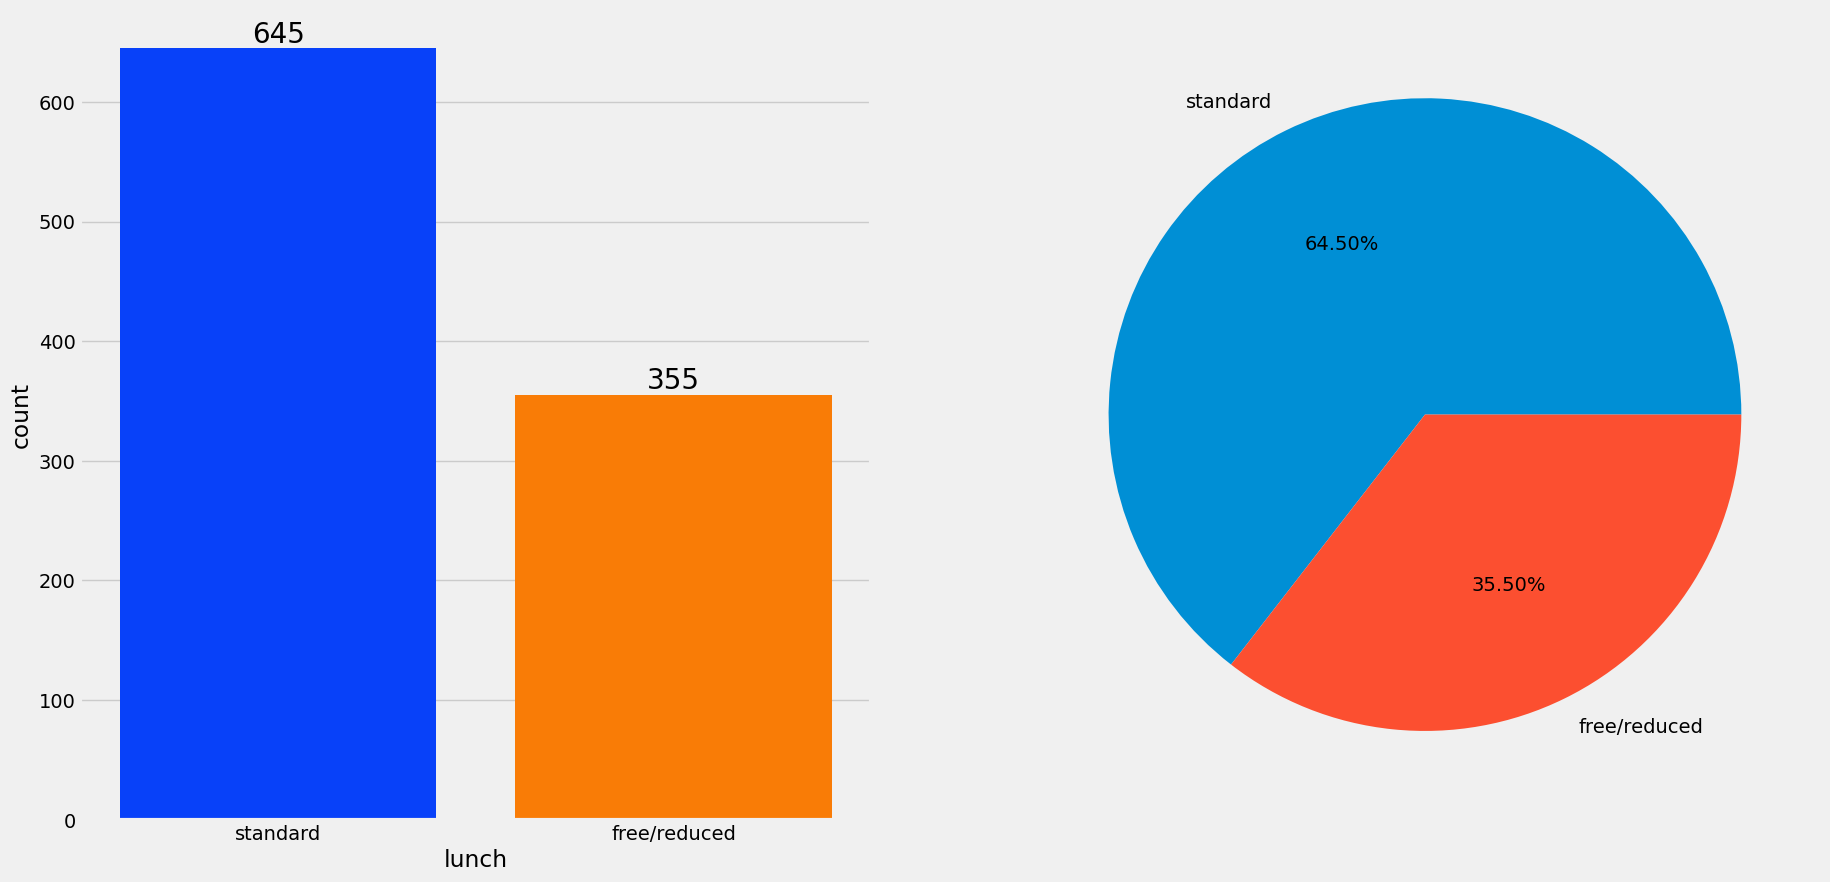

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['lunch'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,autopct='%.2f%%')
plt.show()

**Insights**
* Students being served Standard lunch was more than free lunch

**BIVARIATE ANALYSIS (Is lunch type intake has any impact on student's performance ?)**

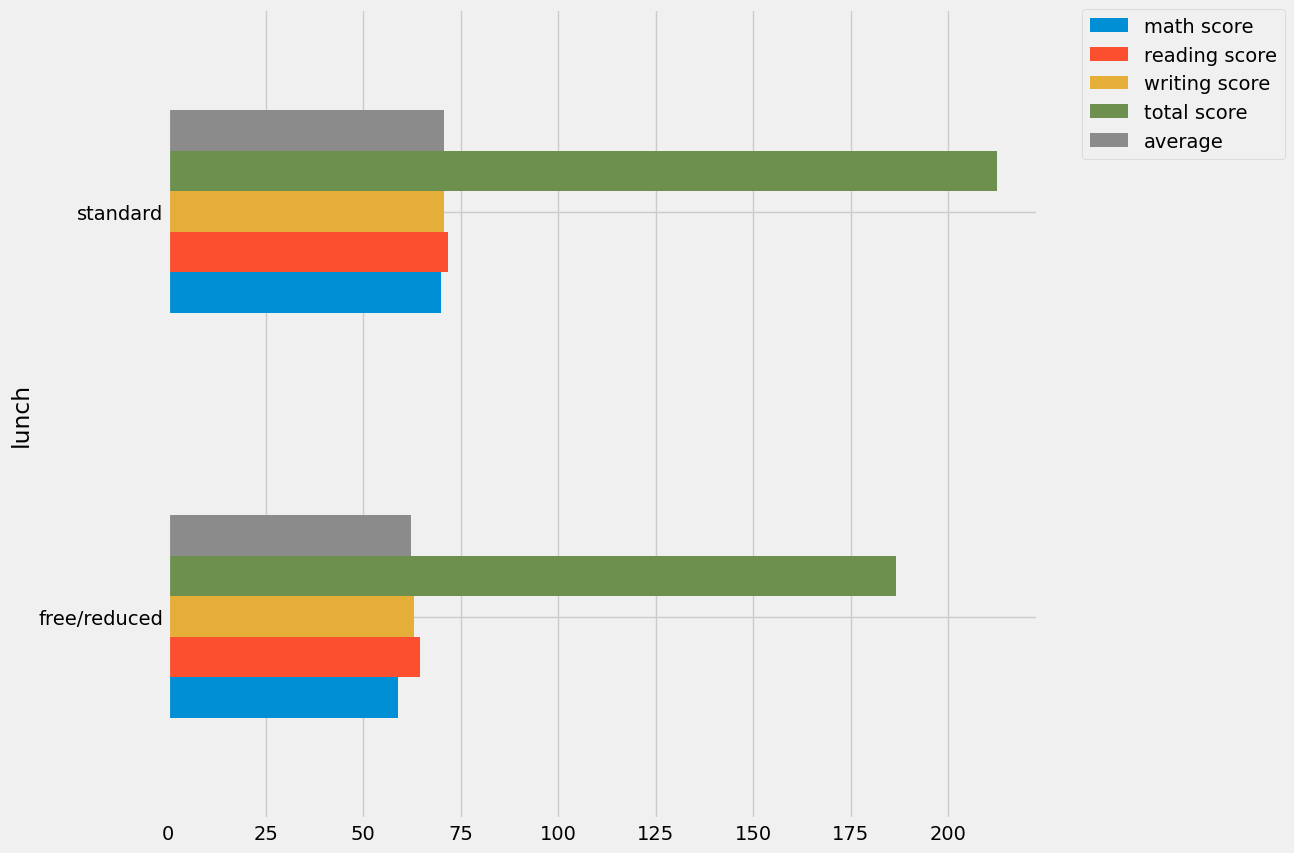

In [30]:
df.groupby('lunch').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

##### 3.2.5 Test Preparation Course Column

**UNIVARIATE ANALYSIS (What is the Test Preparation Course distribution?)**

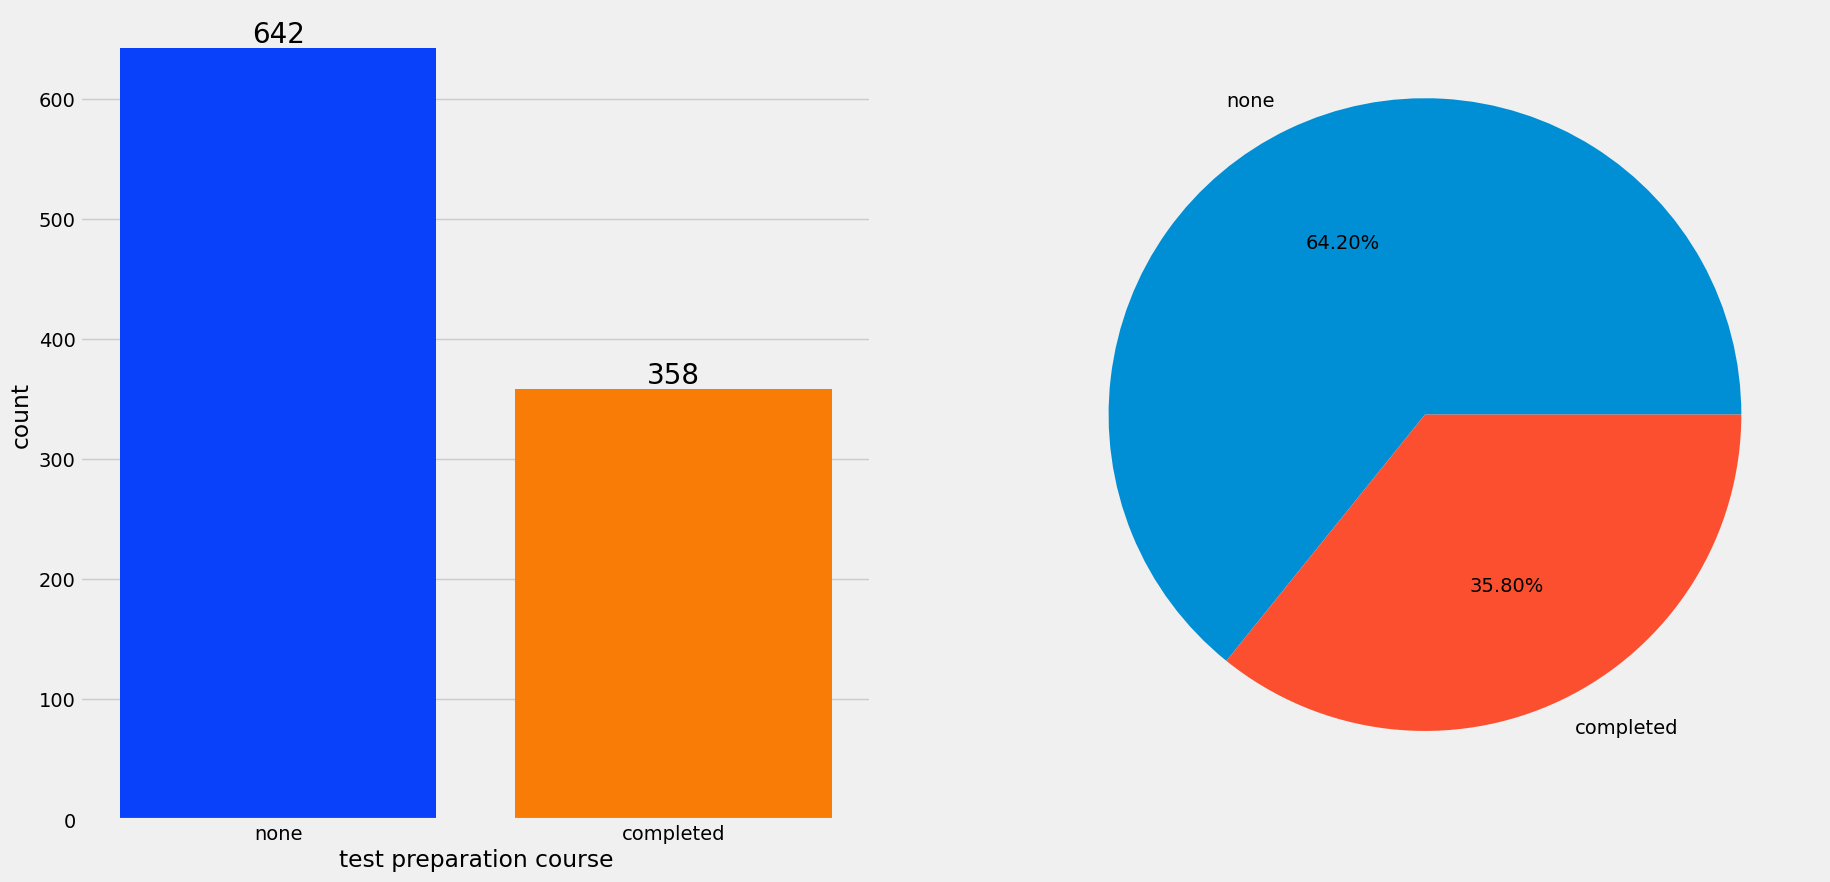

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test preparation course'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['test preparation course'].value_counts(),labels=df['test preparation course'].value_counts().index,autopct='%.2f%%')
plt.show()

**BIVARIATE ANALYSIS (Is Test prepration course has any impact on student's performance ?)**

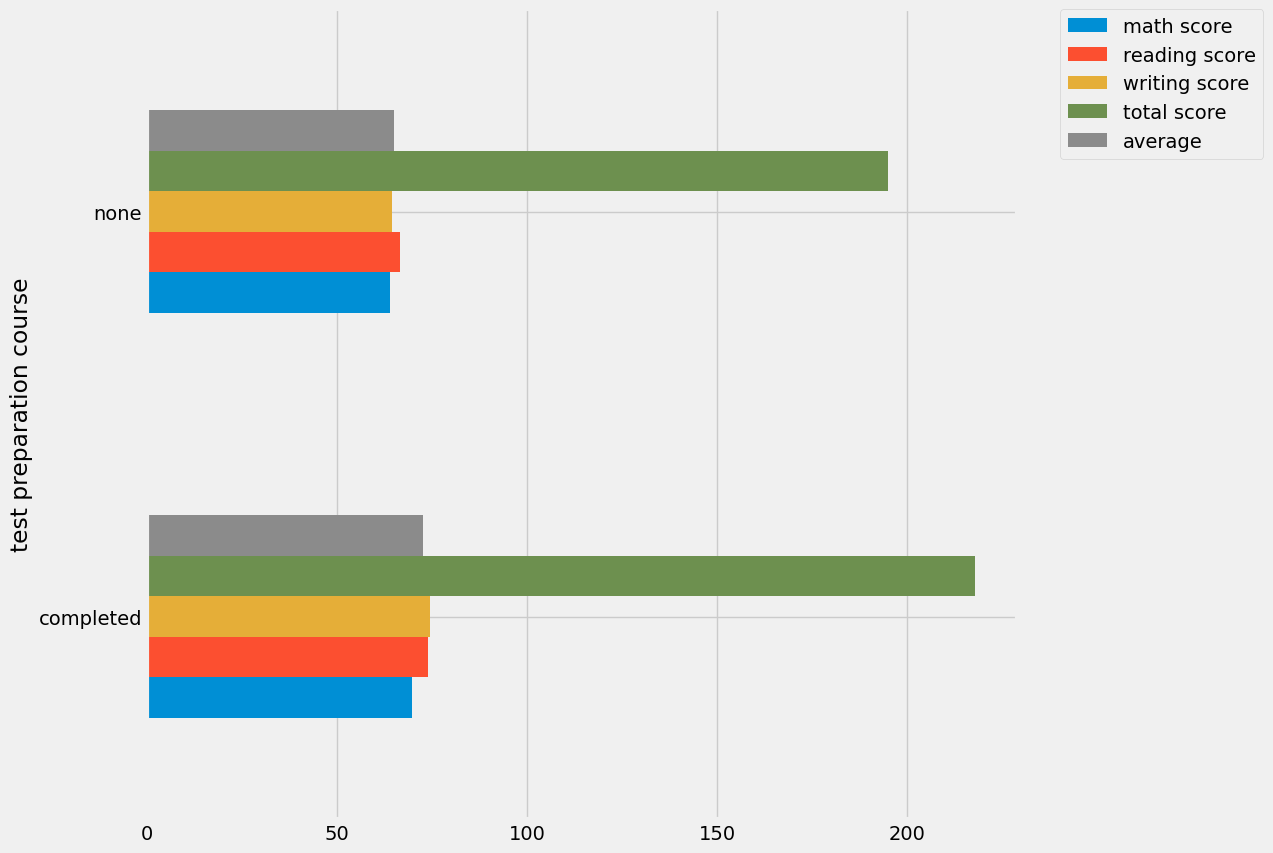

In [32]:
df.groupby('test preparation course').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### 3.3 CHECKING OUTLIERS

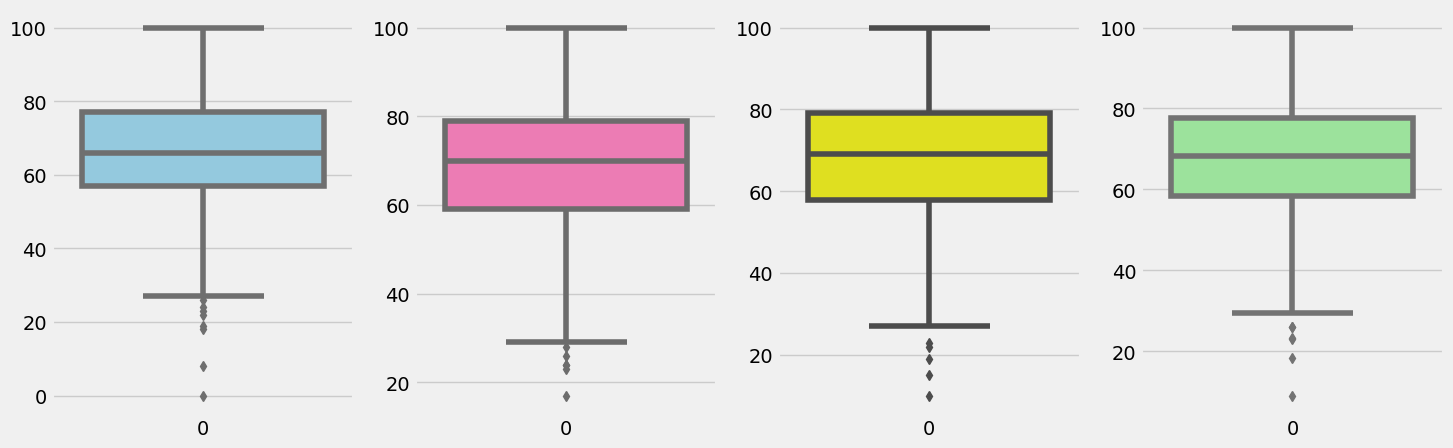

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

##### 3.4 MUTIVARIATE ANALYSIS USING PAIRPLOT

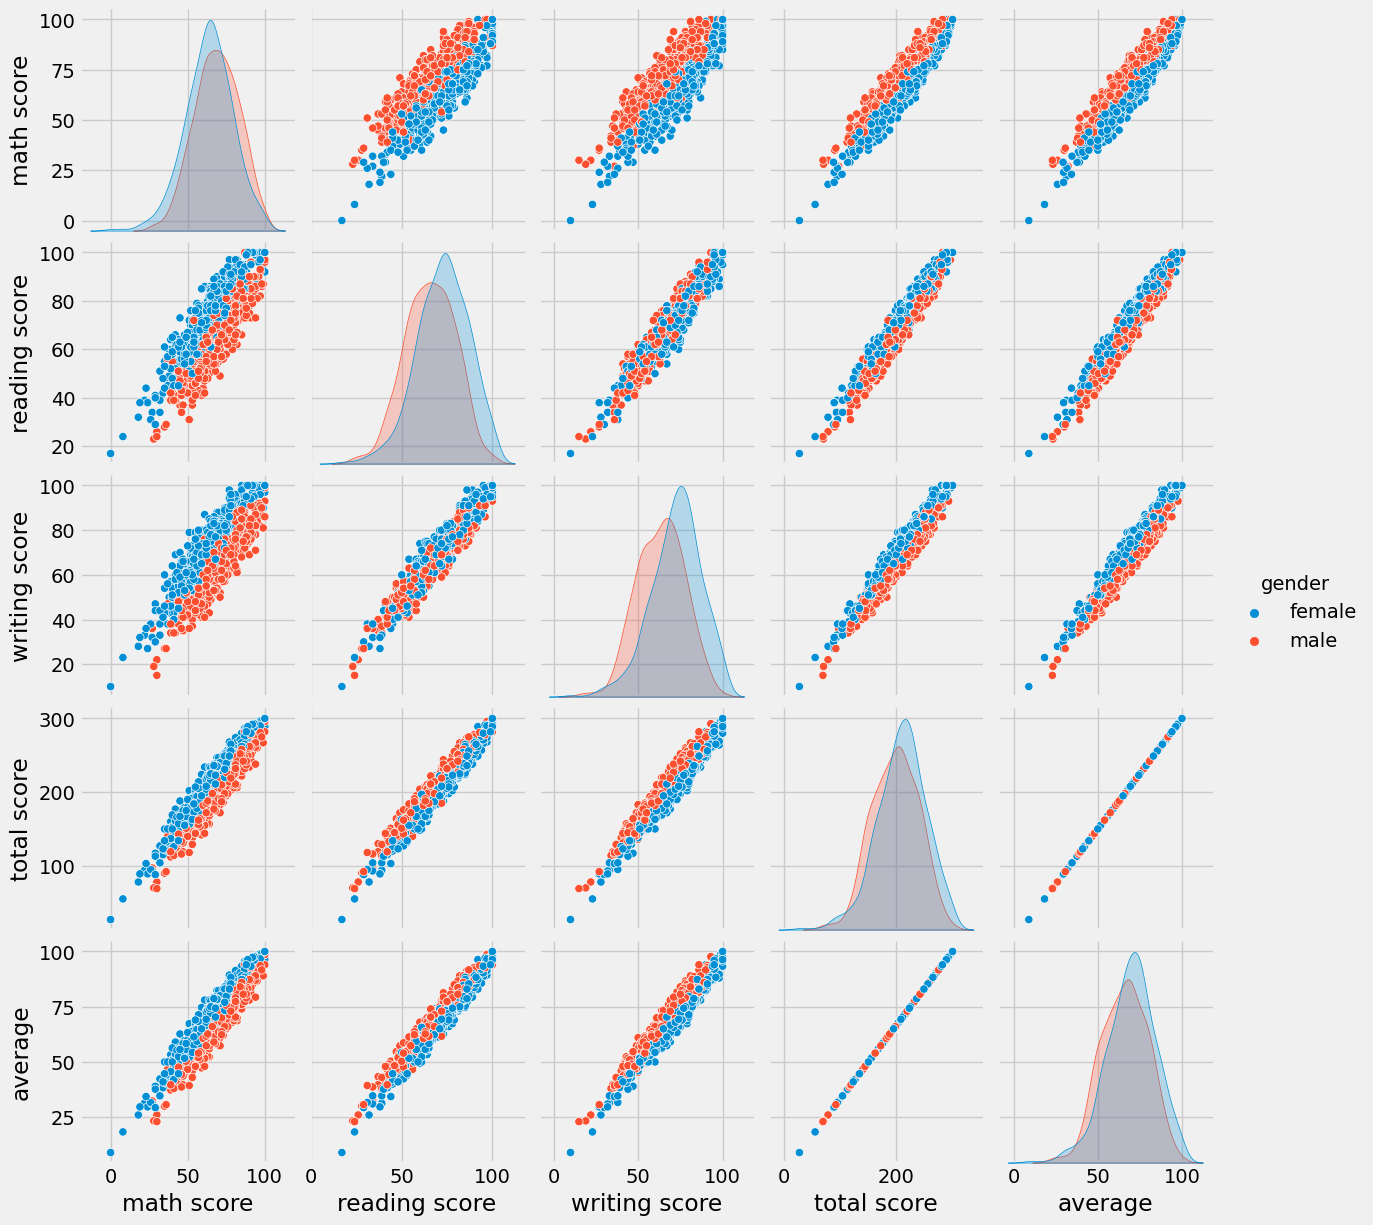

In [34]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Finishing preparation course is benefitial.